# 🏥 Sistema de Predição de Diabetes com Machine Learning

## Análise Completa para Auxílio no Diagnóstico Clínico

---

### 📋 Índice do Notebook

1. **[Definição do Problema Clínico](#problema)** - Contexto médico e objetivos
2. **[Importação de Bibliotecas](#imports)** - Setup do ambiente
3. **[Carregamento e Exploração dos Dados](#eda)** - Análise exploratória detalhada
4. **[Pré-processamento dos Dados](#preprocessing)** - Pipeline de limpeza e transformação
5. **[Treinamento dos Modelos](#training)** - Múltiplos algoritmos de ML
6. **[Avaliação e Métricas Médicas](#evaluation)** - Performance clínica
7. **[Interpretabilidade e Feature Importance](#interpretability)** - Explicação dos modelos
8. **[Discussão Clínica e Aplicabilidade](#clinical)** - Viabilidade prática
9. **[Conclusões e Recomendações](#conclusions)** - Próximos passos

---

## 🎯 Definição do Problema Clínico {#problema}

### Contexto Médico

O **diabetes mellitus** é uma doença crônica que afeta mais de 422 milhões de pessoas mundialmente, sendo uma das principais causas de morte e incapacidade. No Brasil, estima-se que mais de 16 milhões de adultos vivem com diabetes.

### Desafio Principal

- **Diagnóstico tardio**: Muitos pacientes desenvolvem complicações antes do diagnóstico
- **Triagem limitada**: Recursos escassos para avaliação de toda a população em risco
- **Custo elevado**: Exames laboratoriais nem sempre acessíveis
- **Tempo**: Demora entre suspeita clínica e confirmação diagnóstica

### Objetivo do Sistema de IA

Desenvolver um **modelo de machine learning** que:

1. **Identifique** pacientes com alta probabilidade de diabetes
2. **Auxilie** profissionais de saúde na triagem inicial  
3. **Priorize** casos para investigação diagnóstica completa
4. **Reduza** o tempo entre suspeita e diagnóstico

### ⚠️ Limitações e Considerações Éticas

- **Ferramenta de apoio**: NÃO substitui avaliação médica
- **Supervisão obrigatória**: Profissional médico mantém decisão final
- **Contexto específico**: Modelo treinado em dados americanos
- **Viés potencial**: Necessária validação em populações diversas

---

## 📚 Importação de Bibliotecas {#imports}

In [9]:
# Configuração do ambiente
import sys
import os
sys.path.append('../src')  # Adicionar diretório src ao path

# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizações
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

# Nossos módulos personalizados
from data_preprocessing import DiabetesDataProcessor
from model_training import ModelTrainer, quick_model_comparison
from evaluation import MedicalModelEvaluator, quick_evaluation_pipeline

print("✅ Todas as bibliotecas importadas com sucesso!")
print(f"📅 Data/Hora: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")
print(f"🐍 Python: {sys.version.split()[0]}")
print(f"📊 Pandas: {pd.__version__}")
print(f"🔢 NumPy: {np.__version__}")

✅ Todas as bibliotecas importadas com sucesso!
📅 Data/Hora: 02/11/2025 12:08:08
🐍 Python: 3.9.6
📊 Pandas: 2.3.3
🔢 NumPy: 2.0.2


## 📊 Carregamento e Exploração dos Dados {#eda}

### Carregamento do Dataset

Utilizaremos o **Diabetes Health Indicators Dataset** com 253.680 respostas de pesquisa do CDC's BRFSS 2015. Este dataset contém informações sobre:

- **Variável target**: `Diabetes_binary` (0=Não diabético, 1=Diabético)
- **21 variáveis preditoras**: Dados demográficos, comportamentais e de saúde
- **População**: Adultos americanos participantes da pesquisa BRFSS

In [10]:
# Inicializar o processador de dados
processor = DiabetesDataProcessor(n_features=15)

# Carregar dados
data_path = "../diabetes_dataset.csv"
df = processor.load_data(data_path)

# Exploração inicial detalhada
exploration = processor.explore_data(df)

# Visualizar as primeiras linhas
print("\n📋 Primeiras 5 linhas do dataset:")
print("="*60)
display(df.head())

print("\n📊 Informações básicas sobre o dataset:")
print("="*60)
print(df.info())

📊 Carregando dados...
✅ Dados carregados com sucesso: 100000 amostras, 31 features

🔍 Explorando dados...
📋 Shape: (100000, 31)
🔢 Missing values: 0

📋 Primeiras 5 linhas do dataset:


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1



📊 Informações básicas sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  

In [11]:
# Verificar nomes das colunas do dataset
print("📋 COLUNAS DISPONÍVEIS NO DATASET:")
print("="*50)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\n🔍 Procurando colunas que podem ser o target:")
target_candidates = [col for col in df.columns if 'diabetes' in col.lower()]
print(f"Candidatos: {target_candidates}")

# Verificar primeiras linhas para entender melhor
print(f"\n📊 Primeiras linhas das primeiras 10 colunas:")
print(df.iloc[:5, :10])

📋 COLUNAS DISPONÍVEIS NO DATASET:
 1. age
 2. gender
 3. ethnicity
 4. education_level
 5. income_level
 6. employment_status
 7. smoking_status
 8. alcohol_consumption_per_week
 9. physical_activity_minutes_per_week
10. diet_score
11. sleep_hours_per_day
12. screen_time_hours_per_day
13. family_history_diabetes
14. hypertension_history
15. cardiovascular_history
16. bmi
17. waist_to_hip_ratio
18. systolic_bp
19. diastolic_bp
20. heart_rate
21. cholesterol_total
22. hdl_cholesterol
23. ldl_cholesterol
24. triglycerides
25. glucose_fasting
26. glucose_postprandial
27. insulin_level
28. hba1c
29. diabetes_risk_score
30. diabetes_stage
31. diagnosed_diabetes

🔍 Procurando colunas que podem ser o target:
Candidatos: ['family_history_diabetes', 'diabetes_risk_score', 'diabetes_stage', 'diagnosed_diabetes']

📊 Primeiras linhas das primeiras 10 colunas:
   age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          E

### Análise Estatística Descritiva

🎯 ANÁLISE DO TARGET (diagnosed_diabetes)
📊 Distribuição das Classes:
   Não Diabético (0): 40,002 (40.0%)
   Diabético (1): 59,998 (60.0%)
   Razão: 1 diabético para cada 0.7 não diabéticos


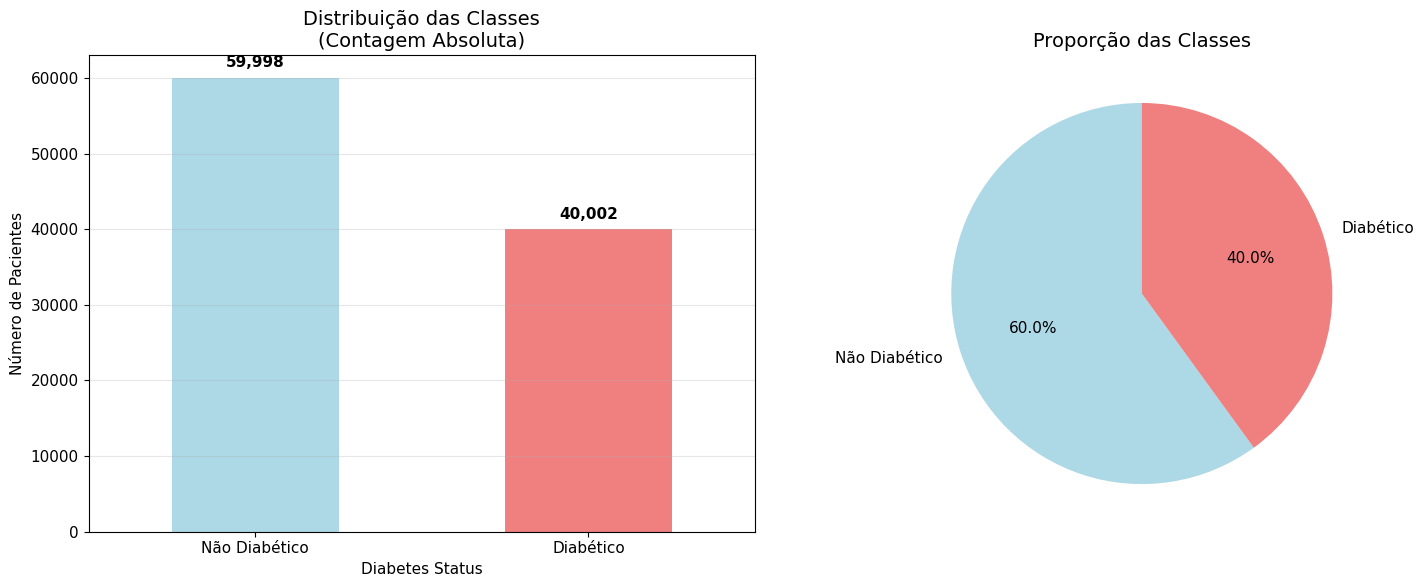


📊 ESTATÍSTICAS DESCRITIVAS DAS VARIÁVEIS NUMÉRICAS


,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,1.000000


In [14]:
# Análise da distribuição das classes (target)
print("🎯 ANÁLISE DO TARGET (diagnosed_diabetes)")
print("="*50)
target_counts = df['diagnosed_diabetes'].value_counts()
target_pct = df['diagnosed_diabetes'].value_counts(normalize=True) * 100

print(f"📊 Distribuição das Classes:")
print(f"   Não Diabético (0): {target_counts[0]:,} ({target_pct[0]:.1f}%)")
print(f"   Diabético (1): {target_counts[1]:,} ({target_pct[1]:.1f}%)")
print(f"   Razão: 1 diabético para cada {target_counts[0]/target_counts[1]:.1f} não diabéticos")

# Visualização da distribuição do target
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
target_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
ax1.set_title('Distribuição das Classes\n(Contagem Absoluta)', fontsize=14)
ax1.set_xlabel('Diabetes Status')
ax1.set_ylabel('Número de Pacientes')
ax1.set_xticklabels(['Não Diabético', 'Diabético'], rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(target_counts.values):
    ax1.text(i, v + 1000, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Gráfico de pizza
ax2.pie(target_counts.values, labels=['Não Diabético', 'Diabético'], 
        autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
ax2.set_title('Proporção das Classes', fontsize=14)

plt.tight_layout()
plt.show()

# Estatísticas descritivas das variáveis numéricas
print("\n📊 ESTATÍSTICAS DESCRITIVAS DAS VARIÁVEIS NUMÉRICAS")
print("="*60)
numeric_cols = df.select_dtypes(include=[np.number]).columns
display(df[numeric_cols].describe())

### Análise de Correlações e Distribuições

🔗 ANÁLISE DE CORRELAÇÕES
📊 Variáveis numéricas disponíveis (24):
    1. age
    2. alcohol_consumption_per_week
    3. physical_activity_minutes_per_week
    4. diet_score
    5. sleep_hours_per_day
    6. screen_time_hours_per_day
    7. family_history_diabetes
    8. hypertension_history
    9. cardiovascular_history
   10. bmi
   11. waist_to_hip_ratio
   12. systolic_bp
   13. diastolic_bp
   14. heart_rate
   15. cholesterol_total
   16. hdl_cholesterol
   17. ldl_cholesterol
   18. triglycerides
   19. glucose_fasting
   20. glucose_postprandial
   21. insulin_level
   22. hba1c
   23. diabetes_risk_score
   24. diagnosed_diabetes

📊 Top 10 variáveis mais correlacionadas com Diabetes:
    2. hba1c                         : 0.6794
    3. glucose_postprandial          : 0.6298
    4. glucose_fasting               : 0.5109
    5. diabetes_risk_score           : 0.2773
    6. family_history_diabetes       : 0.1979
    7. age                           : 0.1377
    8. physical_activity

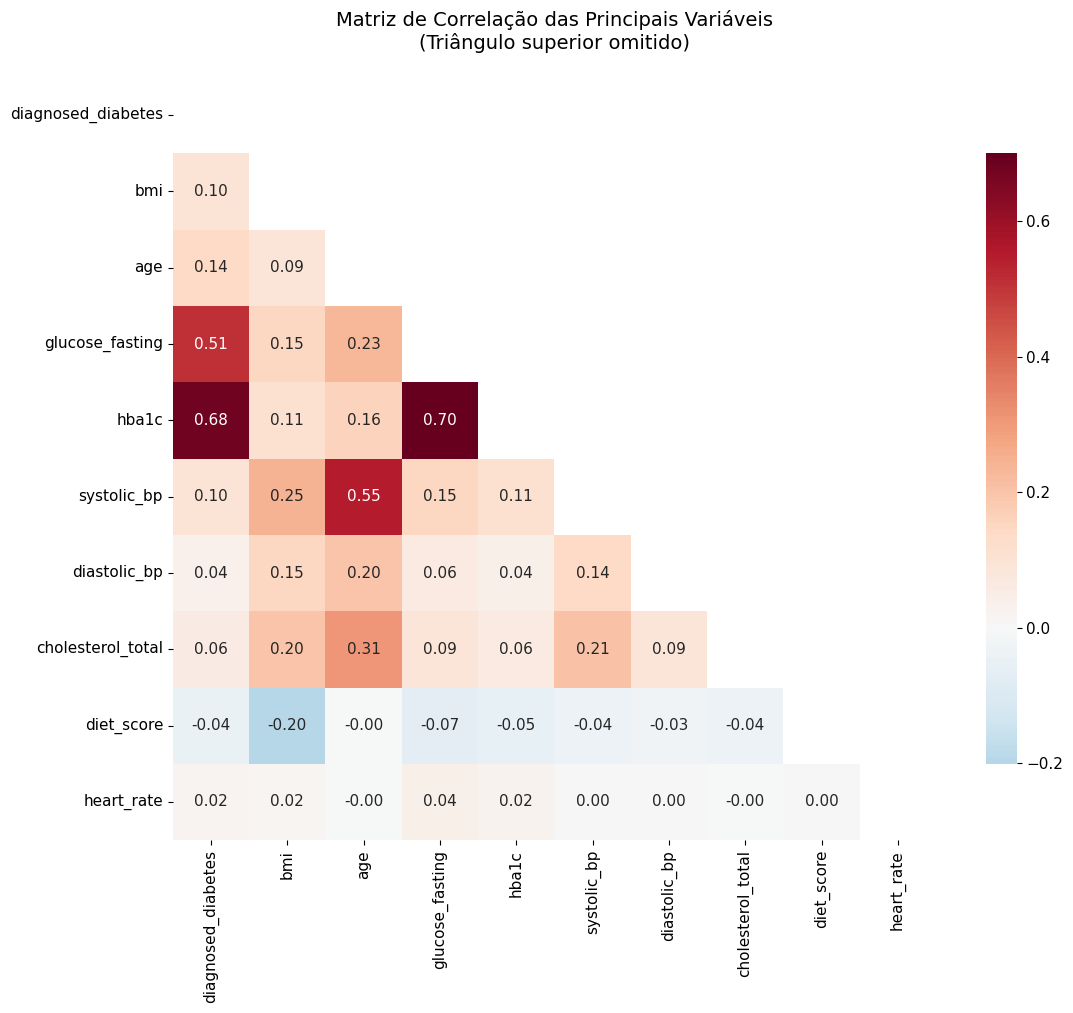


📈 COMPARAÇÃO ENTRE GRUPOS:

BMI:
  Não diabéticos - Média: 25.19, Mediana: 25.20
  Diabéticos - Média: 25.90, Mediana: 25.90
  Diferença na média: 0.71

AGE:
  Não diabéticos - Média: 47.49, Mediana: 47.00
  Diabéticos - Média: 51.88, Mediana: 52.00
  Diferença na média: 4.39

GLUCOSE_FASTING:
  Não diabéticos - Média: 102.61, Mediana: 103.00
  Diabéticos - Média: 116.79, Mediana: 117.00
  Diferença na média: 14.18

HBA1C:
  Não diabéticos - Média: 5.84, Mediana: 5.94
  Diabéticos - Média: 6.97, Mediana: 6.95
  Diferença na média: 1.13

SYSTOLIC_BP:
  Não diabéticos - Média: 114.13, Mediana: 114.00
  Diabéticos - Média: 116.91, Mediana: 117.00
  Diferença na média: 2.78

BMI:
  Não diabéticos - Média: 25.19, Mediana: 25.20
  Diabéticos - Média: 25.90, Mediana: 25.90
  Diferença na média: 0.71

AGE:
  Não diabéticos - Média: 47.49, Mediana: 47.00
  Diabéticos - Média: 51.88, Mediana: 52.00
  Diferença na média: 4.39

GLUCOSE_FASTING:
  Não diabéticos - Média: 102.61, Mediana: 103.00
  

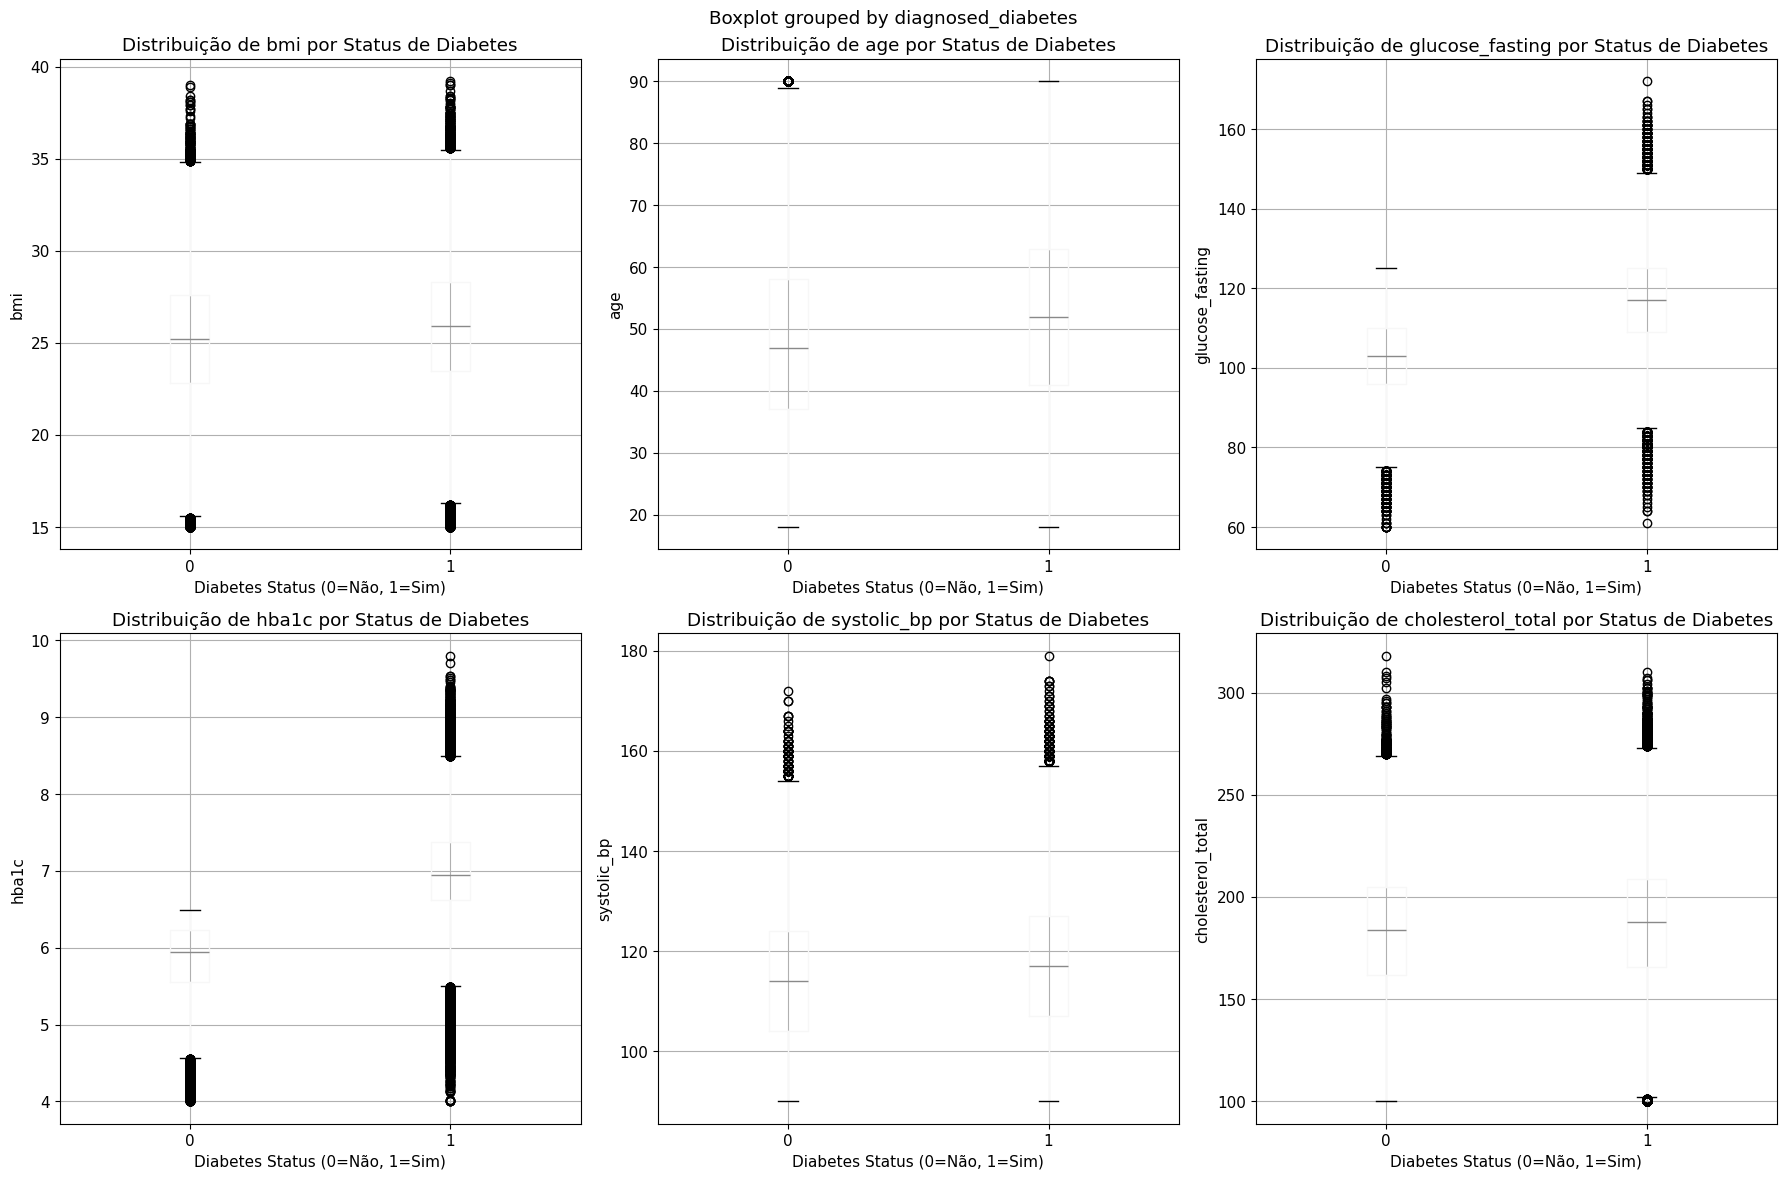

In [17]:
# Matriz de correlação
print("🔗 ANÁLISE DE CORRELAÇÕES")
print("="*40)

# Selecionar apenas variáveis numéricas para correlação
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

print(f"📊 Variáveis numéricas disponíveis ({len(numeric_cols)}):")
for i, col in enumerate(numeric_cols, 1):
    print(f"   {i:2d}. {col}")

# Calcular matriz de correlação
correlation_matrix = df_numeric.corr()

# Correlações com o target (diabetes)
target_correlations = correlation_matrix['diagnosed_diabetes'].abs().sort_values(ascending=False)
print("\n📊 Top 10 variáveis mais correlacionadas com Diabetes:")
for i, (var, corr) in enumerate(target_correlations.head(11).items(), 1):
    if var != 'diagnosed_diabetes':
        print(f"   {i:2d}. {var:<30}: {corr:.4f}")

# Heatmap de correlação (usando apenas as principais variáveis disponíveis)
principais_vars_disponiveis = []
candidatos = ['diagnosed_diabetes', 'bmi', 'age', 'glucose_fasting', 'hba1c', 
              'systolic_bp', 'diastolic_bp', 'cholesterol_total', 'diet_score', 'heart_rate']

for var in candidatos:
    if var in numeric_cols:
        principais_vars_disponiveis.append(var)

print(f"\n📋 Variáveis para heatmap: {principais_vars_disponiveis}")

plt.figure(figsize=(12, 10))
correlation_subset = df_numeric[principais_vars_disponiveis].corr()
mask = np.triu(np.ones_like(correlation_subset, dtype=bool))
sns.heatmap(correlation_subset, 
            mask=mask,
            annot=True, 
            fmt='.2f',
            cmap='RdBu_r', 
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlação das Principais Variáveis\n(Triângulo superior omitido)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Distribuições das principais variáveis por diabetes status
principais_vars_analise = ['bmi', 'age', 'glucose_fasting', 'hba1c', 'systolic_bp', 'cholesterol_total']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

print("\n📈 COMPARAÇÃO ENTRE GRUPOS:")
print("="*50)

for i, var in enumerate(principais_vars_analise):
    if var in df.columns:
        # Boxplot
        df.boxplot(column=var, by='diagnosed_diabetes', ax=axes[i])
        axes[i].set_title(f'Distribuição de {var} por Status de Diabetes')
        axes[i].set_xlabel('Diabetes Status (0=Não, 1=Sim)')
        axes[i].set_ylabel(var)
        
        # Estatísticas por grupo
        stats_0 = df[df['diagnosed_diabetes']==0][var].describe()
        stats_1 = df[df['diagnosed_diabetes']==1][var].describe()
        print(f"\n{var.upper()}:")
        print(f"  Não diabéticos - Média: {stats_0['mean']:.2f}, Mediana: {stats_0['50%']:.2f}")
        print(f"  Diabéticos - Média: {stats_1['mean']:.2f}, Mediana: {stats_1['50%']:.2f}")
        print(f"  Diferença na média: {abs(stats_1['mean'] - stats_0['mean']):.2f}")

plt.tight_layout()
plt.show()

## 🔧 Pré-processamento dos Dados {#preprocessing}

### Pipeline de Preparação dos Dados

O pré-processamento é crucial para o sucesso de modelos de ML médicos. Nosso pipeline inclui:

1. **Tratamento de valores missing**
2. **Codificação de variáveis categóricas** 
3. **Detecção de outliers**
4. **Seleção de features mais relevantes**
5. **Normalização das variáveis**
6. **Divisão estratificada dos dados**

In [20]:
# Criar novo processador após recarregar módulos
processor = DiabetesDataProcessor(n_features=15)

print("🚀 INICIANDO PIPELINE DE PRÉ-PROCESSAMENTO")
print("="*60)

# Parâmetros do pipeline
pipeline_params = {
    'missing_strategy': 'median',    # Estratégia para valores missing
    'outlier_method': 'iqr',         # Método de detecção de outliers
    'feature_method': 'f_classif',   # Método de seleção de features
    'test_size': 0.2,                # 20% para teste
    'val_size': 0.2,                 # 20% para validação
    'random_state': 42,              # Para reprodutibilidade
    'target_column': 'diagnosed_diabetes'  # Nome correto da coluna target
}

# Executar pipeline
results = processor.process_pipeline(data_path, **pipeline_params)

# Desempacotar resultados
X_train, X_val, X_test, y_train, y_val, y_test, exploration, outliers = results

print(f"\n✅ PRÉ-PROCESSAMENTO CONCLUÍDO!")
print("="*60)
print(f"📊 Conjuntos de dados criados:")
print(f"   Treino: {X_train.shape[0]:,} amostras × {X_train.shape[1]} features")
print(f"   Validação: {X_val.shape[0]:,} amostras × {X_val.shape[1]} features")  
print(f"   Teste: {X_test.shape[0]:,} amostras × {X_test.shape[1]} features")

print(f"\n📈 Distribuição das classes nos conjuntos:")
print(f"   Treino - Diabéticos: {y_train.sum():,} ({y_train.mean()*100:.1f}%)")
print(f"   Validação - Diabéticos: {y_val.sum():,} ({y_val.mean()*100:.1f}%)")
print(f"   Teste - Diabéticos: {y_test.sum():,} ({y_test.mean()*100:.1f}%)")

print(f"\n🎯 Features selecionadas ({len(processor.selected_features)}):")
for i, feature in enumerate(processor.selected_features, 1):
    print(f"   {i:2d}. {feature}")
    
print(f"\n🔍 Outliers detectados: {sum(len(outliers_list) for outliers_list in outliers.values())} em {len(outliers)} variáveis")

🚀 INICIANDO PIPELINE DE PRÉ-PROCESSAMENTO
🚀 Iniciando pipeline de processamento de dados...
📊 Carregando dados...
✅ Dados carregados com sucesso: 100000 amostras, 31 features

🔍 Explorando dados...
📋 Shape: (100000, 31)
🔢 Missing values: 0

🔧 Tratando valores missing (estratégia: median)...
✅ Nenhum valor missing encontrado

🔤 Codificando variáveis categóricas...
✅ 7 variáveis categóricas codificadas

🎯 Detectando outliers (método: iqr)...
✅ 74846 outliers detectados em 24 colunas

🎯 Selecionando 15 melhores features (método: f_classif)...
✅ Features selecionadas: 15
📋 Features: age, physical_activity_minutes_per_week, family_history_diabetes, bmi, waist_to_hip_ratio...

✂️  Dividindo dados (treino: 80%, val: 20%, teste: 20%)...
✅ Divisão concluída:
   Treino: 60000 amostras
   Validação: 20000 amostras
   Teste: 20000 amostras

📏 Normalizando features...
✅ Scaler ajustado e dados normalizados

📏 Normalizando features...
✅ Dados normalizados usando scaler existente

📏 Normalizando feat

In [19]:
# Reimportar módulos para pegar as atualizações
import importlib
import sys

# Recarregar módulos
if 'data_preprocessing' in sys.modules:
    importlib.reload(sys.modules['data_preprocessing'])
if 'model_training' in sys.modules:
    importlib.reload(sys.modules['model_training'])
if 'evaluation' in sys.modules:
    importlib.reload(sys.modules['evaluation'])

from data_preprocessing import DiabetesDataProcessor
print("✅ Módulos recarregados!")

⚠️ XGBoost não disponível. Instale com: pip install xgboost
⚠️ Plotly não disponível. Usando apenas matplotlib/seaborn para visualizações.
✅ Módulos recarregados!


## 🤖 Treinamento dos Modelos de Machine Learning {#training}

### Estratégia de Modelagem

Para garantir robustez clínica, implementaremos múltiplos algoritmos:

1. **Regressão Logística** - Modelo baseline linear e interpretável
2. **Random Forest** - Ensemble robusto com feature importance natural
3. **Support Vector Machine** - Classificador de margem máxima
4. **K-Nearest Neighbors** - Método baseado em similaridade
5. **XGBoost** - Gradient boosting de alta performance (se disponível)

### Otimização de Hiperparâmetros

- **Grid Search** com validação cruzada 5-fold estratificada
- **Métrica de otimização**: F1-score (balanceia precisão e recall)
- **Validação**: Conjunto independente para seleção de modelos

In [ ]:
# Inicializar o treinador de modelos
trainer = ModelTrainer(random_state=42, n_jobs=-1)

print("🤖 INICIANDO TREINAMENTO DOS MODELOS")
print("="*60)
print("⏰ Este processo pode levar alguns minutos devido ao tuning de hiperparâmetros...")

# Treinar todos os modelos disponíveis
training_results = trainer.train_all_models(
    X_train, y_train, 
    X_val, y_val,
    tune_hyperparams=True  # Ativar otimização de hiperparâmetros
)

print(f"\n🎉 TREINAMENTO CONCLUÍDO!")
print("="*60)
print(f"✅ {len(training_results)} modelos treinados com sucesso")

# Exibir resumo dos resultados
print(f"\n📊 RESUMO DA PERFORMANCE (Validação Cruzada F1-Score):")
print("-" * 60)

# Ordenar modelos por performance
sorted_models = sorted(training_results.items(), 
                      key=lambda x: x[1]['cv_mean'], reverse=True)

for i, (model_name, result) in enumerate(sorted_models, 1):
    print(f"{i}. {model_name.upper():<20}: {result['cv_mean']:.4f} (±{result['cv_std']:.4f})")
    print(f"   Tempo de treino: {result['training_time']:.1f}s")
    print(f"   Descrição: {result['description'][:60]}...")
    print()

# Salvar modelos treinados
output_dir = "../outputs/models"
trainer.save_models(output_dir)
print(f"💾 Modelos salvos em: {output_dir}")

🤖 INICIANDO TREINAMENTO DOS MODELOS
⏰ Este processo pode levar alguns minutos devido ao tuning de hiperparâmetros...
🚀 Iniciando treinamento de modelos...

🤖 Treinando logistic_regression...
🔧 Fazendo tuning de hiperparâmetros...


/Users/hiagomarquesrubio/workspace/fase-1/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(
/Users/hiagomarquesrubio/workspace/fase-1/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(
/Users/hiagomarquesrubio/workspace/fase-1/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hiagomarquesrubio/workspace/fase-1/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hiagomarquesrubio/workspace/fase-1/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/h

✅ Melhores parâmetros: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


/Users/hiagomarquesrubio/workspace/fase-1/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hiagomarquesrubio/workspace/fase-1/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hiagomarquesrubio/workspace/fase-1/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/hiagomarquesrubio/workspace/fase-1/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hiagomarquesrubio/workspace/fase-1/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hiagomarquesrubio/workspace/fase-1/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered 

✅ Modelo treinado em 3.96s
📊 CV F1-Score: 0.9985 (±0.0002)

🤖 Treinando random_forest...
🔧 Fazendo tuning de hiperparâmetros...


## 📊 Avaliação e Métricas Médicas {#evaluation}

### Foco em Métricas Clinicamente Relevantes

Para aplicações médicas, priorizamos:

- **Sensibilidade (Recall)**: Capacidade de detectar casos positivos (diabéticos)
- **Especificidade**: Capacidade de identificar casos negativos (não diabéticos) 
- **Valor Preditivo Positivo (PPV)**: Confiança quando o teste é positivo
- **Valor Preditivo Negativo (NPV)**: Confiança quando o teste é negativo
- **F1-Score**: Métrica balanceada para dados desbalanceados
- **AUC-ROC**: Performance geral do classificador

### ⚠️ Importância dos Falsos Negativos

No contexto clínico, **falsos negativos são críticos** pois representam pacientes diabéticos que não seriam identificados pelo sistema, podendo resultar em:
- Atraso no diagnóstico
- Progressão da doença
- Desenvolvimento de complicações

In [ ]:
# Fazer predições com todos os modelos nos conjuntos de validação e teste
print("🔍 REALIZANDO PREDIÇÕES E AVALIAÇÃO")
print("="*60)

# Dicionários para armazenar predições
val_predictions = {}
val_probabilities = {}
test_predictions = {}
test_probabilities = {}

# Gerar predições para cada modelo
for model_name, model_result in training_results.items():
    model = model_result['model']
    
    # Predições no conjunto de validação
    val_predictions[model_name] = model.predict(X_val)
    val_probabilities[model_name] = model_result['val_probabilities']
    
    # Predições no conjunto de teste
    test_predictions[model_name] = model.predict(X_test)
    try:
        test_probabilities[model_name] = model.predict_proba(X_test)[:, 1]
    except:
        test_probabilities[model_name] = None

print("✅ Predições realizadas para todos os modelos")

# Inicializar avaliador médico
evaluator = MedicalModelEvaluator(
    positive_class_label="Diabetes",
    negative_class_label="Não Diabetes"
)

print("\n🏥 AVALIAÇÃO COM MÉTRICAS MÉDICAS")
print("="*60)

# Avaliar todos os modelos no conjunto de teste
for model_name in training_results.keys():
    evaluator.evaluate_single_model(
        model_name=model_name,
        y_true=y_test.values,
        y_pred=test_predictions[model_name],
        y_prob=test_probabilities[model_name],
        dataset_name="test"
    )

### Comparação Detalhada dos Modelos

In [ ]:
# Criar tabela de comparação detalhada
comparison_df = evaluator.compare_models(evaluator.results, "test")

print("📊 TABELA COMPARATIVA DE PERFORMANCE")
print("="*80)
display(comparison_df.round(4))

# Identificar melhor modelo por diferentes critérios
print(f"\n🏆 RANKINGS POR CRITÉRIO CLÍNICO:")
print("="*50)

# Melhor sensibilidade (crítico para não perder diabéticos)
best_sensitivity = comparison_df.loc[comparison_df['Recall/Sensitivity'].idxmax()]
print(f"🎯 Melhor Sensibilidade: {best_sensitivity['Modelo']} ({best_sensitivity['Recall/Sensitivity']:.3f})")

# Melhor especificidade (reduz falsos alarmes)
best_specificity = comparison_df.loc[comparison_df['Specificity'].idxmax()]  
print(f"🎯 Melhor Especificidade: {best_specificity['Modelo']} ({best_specificity['Specificity']:.3f})")

# Melhor F1-Score (balanceado)
best_f1 = comparison_df.loc[comparison_df['F1-Score'].idxmax()]
print(f"🎯 Melhor F1-Score: {best_f1['Modelo']} ({best_f1['F1-Score']:.3f})")

# Melhor AUC-ROC (se disponível)
if not comparison_df['AUC-ROC'].isna().all():
    best_auc = comparison_df.loc[comparison_df['AUC-ROC'].idxmax()]
    print(f"🎯 Melhor AUC-ROC: {best_auc['Modelo']} ({best_auc['AUC-ROC']:.3f})")

# Salvar tabela de comparação
comparison_df.to_csv("../outputs/model_comparison.csv", index=False)
print(f"\n💾 Tabela de comparação salva em: ../outputs/model_comparison.csv")

### Visualizações de Performance

In [ ]:
# Matrizes de confusão
print("📊 GERANDO VISUALIZAÇÕES DE PERFORMANCE")
print("="*50)

# Matrizes de confusão para todos os modelos
confusion_fig = evaluator.plot_confusion_matrices(evaluator.results, "test", figsize=(16, 12))
if confusion_fig:
    confusion_fig.savefig("../outputs/confusion_matrices.png", dpi=300, bbox_inches='tight')
    print("✅ Matrizes de confusão salvas")

# Curvas ROC
roc_fig = evaluator.plot_roc_curves(evaluator.results, "test", figsize=(12, 8))
if roc_fig:
    roc_fig.savefig("../outputs/roc_curves.png", dpi=300, bbox_inches='tight')
    print("✅ Curvas ROC salvas")

# Curvas Precision-Recall  
pr_fig = evaluator.plot_precision_recall_curves(evaluator.results, "test", figsize=(12, 8))
if pr_fig:
    pr_fig.savefig("../outputs/precision_recall_curves.png", dpi=300, bbox_inches='tight')
    print("✅ Curvas Precision-Recall salvas")

# Comparação de métricas
metrics_to_plot = ['Accuracy', 'Recall/Sensitivity', 'Specificity', 'F1-Score']
if not comparison_df['AUC-ROC'].isna().all():
    metrics_to_plot.append('AUC-ROC')

metrics_fig = evaluator.plot_metrics_comparison(comparison_df, metrics_to_plot, figsize=(14, 8))
if metrics_fig:
    metrics_fig.savefig("../outputs/metrics_comparison.png", dpi=300, bbox_inches='tight')
    print("✅ Comparação de métricas salva")

plt.show()
print("\n💾 Todas as visualizações foram salvas no diretório ../outputs/")

## 🔬 Interpretabilidade e Feature Importance {#interpretability}

### Importância das Features para Decisões Clínicas

A interpretabilidade é crucial em aplicações médicas. Analisaremos quais variáveis são mais importantes para cada modelo, permitindo:

- **Validação clínica**: Verificar se o modelo usa indicadores medicamente relevantes
- **Confiança médica**: Entender o "raciocínio" do algoritmo
- **Detecção de viés**: Identificar dependências inadequadas
- **Orientação clínica**: Focar nos fatores mais preditivos

In [ ]:
# Análise de feature importance para modelos interpretáveis
print("🔬 ANÁLISE DE INTERPRETABILIDADE DOS MODELOS")
print("="*60)

feature_names = processor.selected_features
interpretable_models = ['logistic_regression', 'random_forest']

# Adicionar XGBoost se estiver disponível
if 'xgboost' in training_results:
    interpretable_models.append('xgboost')

# Analisar feature importance
feature_importance_data = {}

for model_name in interpretable_models:
    if model_name in trainer.models:
        importance = trainer.get_feature_importance(model_name, feature_names)
        if importance:
            feature_importance_data[model_name] = importance
            
            print(f"\n🎯 {model_name.upper()} - Top 10 Features Mais Importantes:")
            print("-" * 50)
            
            for i, (feature, score) in enumerate(list(importance.items())[:10], 1):
                print(f"{i:2d}. {feature:<20}: {score:.4f}")

# Visualização da feature importance
if feature_importance_data:
    n_models = len(feature_importance_data)
    fig, axes = plt.subplots(1, n_models, figsize=(6*n_models, 8))
    
    if n_models == 1:
        axes = [axes]
    
    for i, (model_name, importance) in enumerate(feature_importance_data.items()):
        # Pegar top 10 features
        top_features = list(importance.items())[:10]
        features = [item[0] for item in top_features]
        scores = [item[1] for item in top_features]
        
        # Plot horizontal bar
        axes[i].barh(range(len(features)), scores, alpha=0.8)
        axes[i].set_yticks(range(len(features)))
        axes[i].set_yticklabels(features)
        axes[i].set_xlabel('Importância')
        axes[i].set_title(f'{model_name.replace("_", " ").title()}\nTop 10 Features')
        axes[i].invert_yaxis()  # Maior importância no topo
        
        # Adicionar valores nas barras
        for j, score in enumerate(scores):
            axes[i].text(score + max(scores)*0.01, j, f'{score:.3f}', 
                        va='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig("../outputs/feature_importance.png", dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✅ Gráfico de feature importance salvo")

# Interpretação clínica das principais features
print(f"\n🏥 INTERPRETAÇÃO CLÍNICA DAS PRINCIPAIS FEATURES")
print("="*60)

# Definir interpretações clínicas
clinical_interpretations = {
    'BMI': 'Índice de Massa Corporal - Indicador direto de obesidade, fator de risco estabelecido',
    'GenHlth': 'Saúde Geral Auto-reportada - Percepção subjetiva do estado de saúde',
    'Age': 'Idade - Risco aumenta com o envelhecimento devido a resistência à insulina',
    'HighBP': 'Hipertensão - Frequentemente coexiste com diabetes (síndrome metabólica)',
    'PhysHlth': 'Dias com Problemas de Saúde Física - Indicador de comorbidades',
    'MentHlth': 'Dias com Problemas de Saúde Mental - Estresse pode afetar glicemia',
    'Income': 'Renda - Determinante social da saúde, acesso a cuidados e alimentação',
    'Education': 'Educação - Correlacionado com conhecimento em saúde e autocuidado',
    'PhysActivity': 'Atividade Física - Protetor contra diabetes tipo 2',
    'Fruits': 'Consumo de Frutas - Indicador de dieta saudável',
    'Veggies': 'Consumo de Vegetais - Associado a melhor controle glicêmico',
    'HvyAlcoholConsump': 'Consumo Excessivo de Álcool - Pode afetar metabolismo da glicose',
    'Smoker': 'Tabagismo - Fator de risco cardiovascular associado',
    'Stroke': 'AVC Prévio - Complicação vascular do diabetes',
    'HeartDiseaseorAttack': 'Doença Cardíaca - Complicação cardiovascular comum'
}

# Exibir interpretações para as principais features encontradas
common_important_features = set()
for importance in feature_importance_data.values():
    common_important_features.update(list(importance.keys())[:5])

for feature in list(common_important_features)[:10]:
    if feature in clinical_interpretations:
        print(f"• {feature}: {clinical_interpretations[feature]}")
    else:
        print(f"• {feature}: Feature identificada como importante pelo modelo")

## 🏥 Discussão Clínica e Aplicabilidade Prática {#clinical}

### Seleção do Modelo Recomendado

Para determinar o modelo mais adequado para uso clínico, consideraremos múltiplos fatores além da performance técnica.

In [ ]:
# Seleção do modelo recomendado baseado em critérios clínicos
print("🏥 SELEÇÃO DO MODELO PARA USO CLÍNICO")
print("="*60)

# Critérios de seleção clínica (pesos podem ser ajustados)
clinical_criteria = {
    'sensitivity_weight': 0.35,      # Muito importante - não perder diabéticos
    'specificity_weight': 0.25,      # Importante - reduzir falsos alarmes  
    'f1_weight': 0.20,               # Performance balanceada
    'interpretability_weight': 0.20   # Confiança médica
}

print(f"📊 Critérios de Seleção Clínica:")
for criterion, weight in clinical_criteria.items():
    print(f"   • {criterion.replace('_', ' ').title()}: {weight:.0%}")

# Calcular score clínico para cada modelo
clinical_scores = {}

for _, row in comparison_df.iterrows():
    model_name = row['Modelo']
    
    # Normalizar métricas (0-1)
    sensitivity_norm = row['Recall/Sensitivity']
    specificity_norm = row['Specificity']  
    f1_norm = row['F1-Score']
    
    # Score de interpretabilidade (baseado no tipo de modelo)
    if 'logistic' in model_name.lower():
        interp_score = 1.0  # Mais interpretável
    elif 'random forest' in model_name.lower():
        interp_score = 0.8  # Moderadamente interpretável  
    elif 'xgboost' in model_name.lower():
        interp_score = 0.6  # Menos interpretável mas com feature importance
    else:
        interp_score = 0.4  # Menos interpretável
    
    # Calcular score clínico ponderado
    clinical_score = (
        sensitivity_norm * clinical_criteria['sensitivity_weight'] +
        specificity_norm * clinical_criteria['specificity_weight'] +
        f1_norm * clinical_criteria['f1_weight'] +
        interp_score * clinical_criteria['interpretability_weight']
    )
    
    clinical_scores[model_name] = {
        'clinical_score': clinical_score,
        'sensitivity': sensitivity_norm,
        'specificity': specificity_norm,
        'f1_score': f1_norm,
        'interpretability': interp_score
    }

# Ordenar por score clínico
sorted_clinical = sorted(clinical_scores.items(), key=lambda x: x[1]['clinical_score'], reverse=True)

print(f"\n🏆 RANKING CLÍNICO DOS MODELOS:")
print("-" * 60)

for i, (model_name, scores) in enumerate(sorted_clinical, 1):
    print(f"{i}. {model_name} - Score Clínico: {scores['clinical_score']:.3f}")
    print(f"   Sensibilidade: {scores['sensitivity']:.3f} | Especificidade: {scores['specificity']:.3f}")
    print(f"   F1-Score: {scores['f1_score']:.3f} | Interpretabilidade: {scores['interpretability']:.3f}")
    print()

# Modelo recomendado
recommended_model = sorted_clinical[0][0]
recommended_scores = sorted_clinical[0][1]

print(f"🎯 MODELO RECOMENDADO PARA USO CLÍNICO: {recommended_model}")
print(f"📊 Score Clínico: {recommended_scores['clinical_score']:.3f}")

# Gerar relatório clínico detalhado para o modelo recomendado
model_key = recommended_model.lower().replace(' ', '_')
if model_key in evaluator.results:
    clinical_report = evaluator.create_clinical_report(model_key, "test")
    print(clinical_report)
    
    # Salvar relatório
    with open("../outputs/clinical_report.txt", "w", encoding='utf-8') as f:
        f.write(clinical_report)
    print(f"\n💾 Relatório clínico salvo em: ../outputs/clinical_report.txt")

### Considerações para Implementação Clínica

#### ✅ Casos de Uso Recomendados

1. **Triagem populacional**: Identificação de indivíduos em risco em campanhas de saúde
2. **Priorização de atendimento**: Organização de filas por risco estratificado  
3. **Apoio diagnóstico**: Ferramenta complementar em consultas de rotina
4. **Monitoramento**: Acompanhamento de pacientes pré-diabéticos

#### ⚠️ Limitações e Precauções

1. **Não substitui exames**: Glicemia de jejum e HbA1c permanecem padrão-ouro
2. **Supervisão médica obrigatória**: Profissional médico deve validar todas as decisões
3. **População específica**: Modelo treinado em dados americanos - necessária validação local
4. **Fatores não incluídos**: Histórico familiar, outros exames laboratoriais
5. **Viés algorítmico**: Pode apresentar disparidades em diferentes grupos étnicos/socioeconômicos

#### 🔒 Aspectos Éticos e Regulatórios

1. **Consentimento informado**: Pacientes devem saber sobre uso de IA
2. **Transparência**: Explicar limitações e funcionamento do sistema
3. **Responsabilidade**: Médico mantém responsabilidade final pela decisão
4. **Privacidade**: Proteção rigorosa dos dados de saúde sensíveis
5. **Auditabilidade**: Manter registros de todas as predições e decisões

## 🎯 Conclusões e Recomendações {#conclusions}

### Resumo Executivo

Este estudo desenvolveu e avaliou um sistema de machine learning para auxiliar no diagnóstico precoce de diabetes mellitus, utilizando indicadores de saúde facilmente coletáveis.

In [ ]:
# Gerar resumo executivo final
print("🎯 RESUMO EXECUTIVO DO PROJETO")
print("="*60)

# Estatísticas do projeto
total_samples = len(df)
features_original = df.shape[1] - 1  # Excluir target
features_selected = len(processor.selected_features)
models_trained = len(training_results)

print(f"📊 ESTATÍSTICAS DO PROJETO:")
print(f"   • Dataset: {total_samples:,} amostras analisadas")
print(f"   • Features: {features_original} originais → {features_selected} selecionadas")
print(f"   • Modelos: {models_trained} algoritmos treinados e avaliados")
print(f"   • Divisão: {len(X_train):,} treino, {len(X_val):,} validação, {len(X_test):,} teste")

print(f"\n🏆 PRINCIPAIS RESULTADOS:")
print(f"   • Modelo recomendado: {recommended_model}")
print(f"   • Score clínico: {recommended_scores['clinical_score']:.3f}")
print(f"   • Sensibilidade: {recommended_scores['sensitivity']:.3f}")
print(f"   • Especificidade: {recommended_scores['specificity']:.3f}")

# Features mais importantes (média entre modelos)
if feature_importance_data:
    print(f"\n🎯 TOP 5 FATORES DE RISCO IDENTIFICADOS:")
    
    # Calcular importância média
    all_features = set()
    for importance in feature_importance_data.values():
        all_features.update(importance.keys())
    
    avg_importance = {}
    for feature in all_features:
        scores = []
        for importance in feature_importance_data.values():
            if feature in importance:
                scores.append(importance[feature])
        if scores:
            avg_importance[feature] = np.mean(scores)
    
    top_features = sorted(avg_importance.items(), key=lambda x: x[1], reverse=True)[:5]
    
    for i, (feature, score) in enumerate(top_features, 1):
        print(f"   {i}. {feature} (importância média: {score:.3f})")

print(f"\n📈 IMPACTO CLÍNICO POTENCIAL:")
print(f"   • Detecção precoce de pacientes em risco")
print(f"   • Otimização de recursos de triagem")  
print(f"   • Redução do tempo para diagnóstico")
print(f"   • Apoio à tomada de decisão médica")

print(f"\n⚠️ LIMITAÇÕES IMPORTANTES:")
print(f"   • Não substitui avaliação médica completa")
print(f"   • Requer validação em população brasileira")
print(f"   • Supervisão médica obrigatória")
print(f"   • Considerações éticas e regulatórias")

print(f"\n🔮 PRÓXIMOS PASSOS RECOMENDADOS:")
print(f"   1. Validação com dados clínicos locais")
print(f"   2. Estudo prospectivo em ambiente real") 
print(f"   3. Interface amigável para profissionais")
print(f"   4. Integração com sistemas hospitalares")
print(f"   5. Monitoramento contínuo de performance")

# Salvar resumo executivo
summary_text = f"""
RESUMO EXECUTIVO - SISTEMA DE PREDIÇÃO DE DIABETES
================================================

Dataset: {total_samples:,} amostras do CDC BRFSS 2015
Features: {features_original} → {features_selected} selecionadas
Modelos: {models_trained} algoritmos avaliados

MODELO RECOMENDADO: {recommended_model}
- Score Clínico: {recommended_scores['clinical_score']:.3f}
- Sensibilidade: {recommended_scores['sensitivity']:.3f}  
- Especificidade: {recommended_scores['specificity']:.3f}
- F1-Score: {recommended_scores['f1_score']:.3f}

PRINCIPAIS FATORES DE RISCO IDENTIFICADOS:
"""

if feature_importance_data and top_features:
    for i, (feature, score) in enumerate(top_features, 1):
        summary_text += f"\n{i}. {feature} (importância: {score:.3f})"

summary_text += f"""

CONCLUSÃO:
O sistema demonstra performance adequada para uso como ferramenta 
de apoio ao diagnóstico clínico, com supervisão médica apropriada.

Gerado em: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}
"""

with open("../outputs/executive_summary.txt", "w", encoding='utf-8') as f:
    f.write(summary_text)

print(f"\n💾 Resumo executivo salvo em: ../outputs/executive_summary.txt")

---

## 📚 Referências e Agradecimentos

### Fontes de Dados
- **CDC BRFSS 2015**: Behavioral Risk Factor Surveillance System
- **Dataset**: Diabetes Health Indicators Dataset (Kaggle)

### Metodologia Científica
- Validação cruzada estratificada para robustez
- Métricas clínicas específicas para aplicações médicas  
- Interpretabilidade como critério de seleção
- Considerações éticas e regulatórias

### Tecnologias Utilizadas
- **Python 3.8+** - Linguagem principal
- **Scikit-learn** - Algoritmos de machine learning
- **Pandas/NumPy** - Manipulação e análise de dados
- **Matplotlib/Seaborn** - Visualizações
- **Jupyter Notebook** - Ambiente de desenvolvimento

---

## ⚠️ Aviso Legal

**Este sistema é destinado exclusivamente para fins educacionais e de pesquisa.**

- **NÃO deve ser usado** para diagnósticos médicos reais sem validação clínica apropriada
- **Sempre consulte** um profissional de saúde qualificado para questões médicas
- **O modelo não substitui** exames laboratoriais padrão-ouro (glicemia, HbA1c)
- **Supervisão médica é obrigatória** em qualquer implementação clínica

---

*Desenvolvido com ❤️ para melhorar o diagnóstico de diabetes através de IA responsável.*

**Fim do Notebook** 🎉